Para obtener un mejor resultado en la integracion es mejor utilizar la aproximación de segundo orden
y con varias variables. Como vimos en clase:
    
$$
\vec y_{n+1} = \vec y_{n} + \frac{1}{2}h^2 \left(\frac{\partial \vec f}{\partial x} + \mathbb{J}\vec f \right)
$$

donde $f$ es $f(x_{n},\vec y_{n})$, $\mathbb{J}$ es el jacobiano de $f$ evaluado en $(x_{n},\vec y_{n})$, y el orden del error es de $O(h^2)$

In [4]:
from pylab import *
%matplotlib inline

/home/jz/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


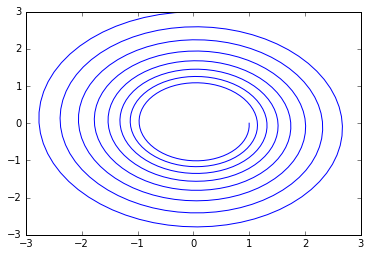

In [5]:
def integra2(ec,d_ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        df,jac=d_ec(sol[i,:],tiempos[i])
        sol[i+1,:]=sol[i,:]+h*f+(0.5*h*h*(jac[0] + dot(jac[1],f)))
    return tiempos,sol

def prueba(y,t):
    return array([y[1],-y[0]])
def d_prueba(y,t):
    return array([0,0]),array([[0,1],[-1,0]])

t,y=integra2(prueba,d_prueba,[1,0],[0,50],0.1)
plot(y[:,0],y[:,1])

Hacer como ejemplo para el siguiente método:

$$
y\prime\prime+2\gamma y\prime + w_{0}^{2} sin(y) = sin(t)
$$

Simplificado por cambio de variable:

$$
u\prime = -2\gamma u - w_{0}^{2} sin(y) + sin(t)
$$

De manera que la parcial y el Jacobiano son:
$$
\frac{\partial f }{\partial t} = (0,cos(t)) \\
J = \begin{pmatrix} 0 & 1 \\ -0.5cos(t) & -2 \end{pmatrix}
$$

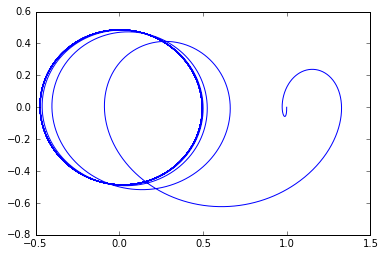

In [6]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+sin(t)])
def dp(y,t):
    return array([0,cos(t)]),array([[0,1],[-0.5*cos(y[0]),-2]])
t,y = integra2(p,dp,[1,0],[0,100],0.01)
plot(y[:,0],y[:,1])

# Método de Runge-Kutta, orden dos

La solución exacta sería:

$$
\vec y_{n+1} = \vec y_{n} + \int_{x_{n}}^{x_{n+1}} \vec f(x,\vec y)dx
$$
Aproximando con Taylor a primer orden:
$$
\vec f(x) = \vec f(x_{0}) + \vec f(x_{0})x + O(h^2)
$$

donde $x\in [0,h]$

Pero Runge-Kutta de segundo orden nos dice que:
$$
\vec y_{n+1} = \vec y_{n} + h\vec f(x_{n+0.5},y_{n+0.5}) + O(h^3)
$$
con
$$
h = x_{n+1}-x_{n}
\\
x_{n+0.5} = \frac{ x_{n+1} + x_{n}}{2}
\\
\vec y_{n+0.5} = \vec y_{n} + \frac{h}{2} f( x_{n} , \vec y_{n})
$$

Finalmente, el método se puede resumir a:
$$
\vec y_{n+1} = \vec y_{n} + hf(x_{n}+0.5h, y_{n} + 0.5hf(x_{n},y_{n}))
\\
k_{1} = hf(x_{n},y_{n})
\\
\vec y_{n+1} = \vec y_{n} + hf(x_{n}+0.5h, y_{n} + 0.5k_{1})
$$
Y para incrementar el orden de la aproximación podemos usar una $k_{n}$ para el paso de la solución,
que estará definida recursivamente en función de $k_{1},...,k_{n-1}$

In [7]:
def int_rk2(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        f=ec(sol[i,:],tiempos[i])
        f_next = ec(sol[i,:]+(h/2)*f,tiempos[i]+h/2)
        y_next = sol[i,:] + h*f_next
        sol[i+1,:]=y_next
    return tiempos,sol

Regresamos al ejemplo anterior.

Notemos la ventaja de que no hay que utilizar el Jacobiano ni la parcial. El método es agnóstico de las derivadas analíticas de nuestras ecuaciones diferenciales.

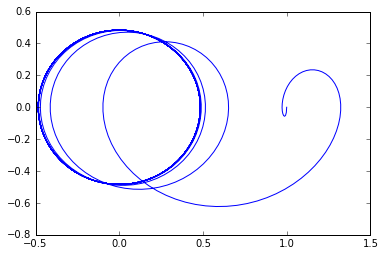

In [8]:
def p(y,t):
    return array([y[1],-2*y[1]-0.5*sin(y[0])+sin(t)])
t,y = int_rk2(p,[1,0],[0,100],0.1)
plot(y[:,0],y[:,1])

calse del 05/09/16

# Movimiento planetario

Resolvamos
$$\frac{d \vec p}{dt} = -\frac{GMm}{|\vec{r}-\vec{r_M}|} (\hat{\vec{r}-\vec{r_M}})$$

Consideremos el movimiento en el plano $z$, i.e, $z=\dot{z}=0$ y sin perdida de generalidad $\vec{r_M}=0$


Por lo que llegamos a

$$ \frac{d^2 r}{dt^2} = - \frac{GM}{r^2}\hat{r}$$


Haciendo el cambio de variable
$$\rho = \frac{\vec r}{R_T}$$ donde $R_T = <r(t)>$
$$\tau = \sqrt{\frac{GM}{R_t^3}}t $$
Tenemos $$\frac{d^2}{d\tau^2} = \frac{GM}{R_T^3}\frac{d^2 }{dt^2}$$

Así llegamos a
$$ \frac{d^2 \vec \rho}{d\tau^2} = -\frac{\vec \rho}{\rho^3}$$

In [9]:
def mov_planetario(x, t):
    r3 = (x[0]*x[0]+x[1]*x[1])**(1.5)
    drx = x[2]
    dry = x[3]
    dvrx = -x[0]/r3
    dvry = -x[1]/r3
    return array([drx, dry, dvrx, dvry])

def J_mov_planetario(x, t):
    d_ec = array([0,0,0,0])
    r5 = (x[0]*x[0]+x[1]*x[1])**(2.5)
    rxmry = (2*x[0]*x[0]-x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1]-x[0]*x[0])/r5
    rxry = (3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry, rxry, 0,0],[rxry,rymrx,0,0]])
    return d_ec, Jac

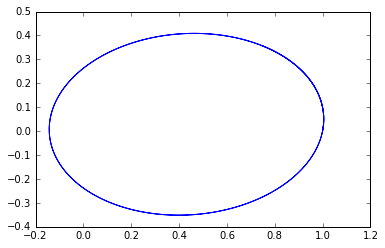

In [12]:
t, r_vr = int_rk2(mov_planetario, array([1.0, 0.0, 0.1, 0.5]), [0,2*pi], 1.0e-4)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(r_vr[:,0], r_vr[:,1])
ax.set_aspect('equal');

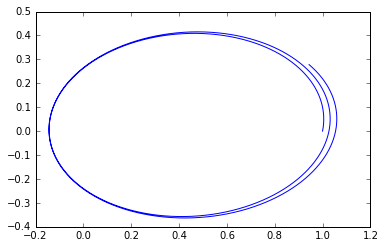

In [13]:
t, r_vr = integra2(mov_planetario, J_mov_planetario, array([1.0, 0.0, 0.1, 0.5]), [0,2*pi], 1.0e-4)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(r_vr[:,0], r_vr[:,1])
ax.set_aspect('equal');

In [24]:
def int_rk4(ec,p_ini,x,h=0.1):
    tiempos = arange(x[0],x[1]+h,h)
    sol = zeros((len(tiempos),len(p_ini)))
    sol[0,:] = p_ini
    for i in xrange(len(tiempos)-1):
        k1 = ec(sol[i,:],tiempos[i])
        k2 = ec(sol[i,:]+0.5*h*k1,tiempos[i]+0.5*h)
        k3 = ec(sol[i,:]+0.5*h*k2,tiempos[i]+0.5*h)
        k4 = ec(sol[i,:]+h*k3,tiempos[i]+h)
        sol[i+1,:] = sol[i,:] + (h/6.0)*(k1+2*k2+2*k3+k4)
    return tiempos,sol

CPU times: user 67.3 ms, sys: 0 ns, total: 67.3 ms
Wall time: 65.3 ms


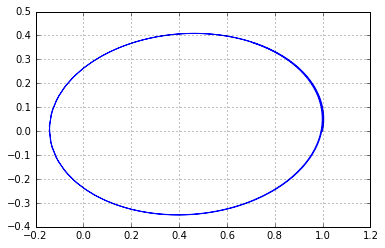

In [34]:
%%time
t, r_vr = int_rk4(mov_planetario, array([1.0, 0.0, 0.1, 0.5]), [0,2*pi], 2e-2)

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(r_vr[:,0], r_vr[:,1])
ax.set_aspect('equal');
ax.grid(True)

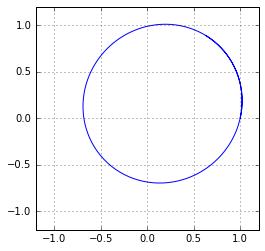

CPU times: user 142 ms, sys: 3.92 ms, total: 146 ms
Wall time: 144 ms


In [42]:
%%time
from scipy.integrate import odeint
r_vr = odeint(mov_planetario,[1,0,0.2,0.9],t)
zoom = 1.2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1])
show()
# ESTA CURVA SE LLAMA LA ODOGRAFA
# PARA EL PROBLEMA DE KEPLER, SIEMPRE ES UN CIRCULO!
# RICH HABLARA DE ESTO EN LA CLASE DEL 12/09/16